## IMPORTING THE LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
data =pd.read_csv("electricity_dah_prices[1].csv")

## EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8761 non-null   object 
 1   hour     8761 non-null   object 
 2   france   8760 non-null   float64
 3   italy    8760 non-null   float64
 4   belgium  8760 non-null   float64
 5   spain    8760 non-null   float64
 6   uk       7319 non-null   float64
 7   germany  8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.7+ KB


In [5]:
data.isnull().sum()

date          0
hour          0
france        1
italy         1
belgium       1
spain         1
uk         1442
germany       1
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])


In [7]:
data.dropna(inplace=True)

## AVERAGE TREND OF POWER PRICES IN A  MONTHS IN EACH COUNTRY

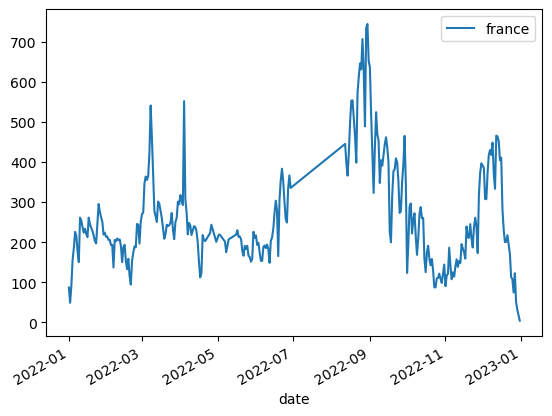

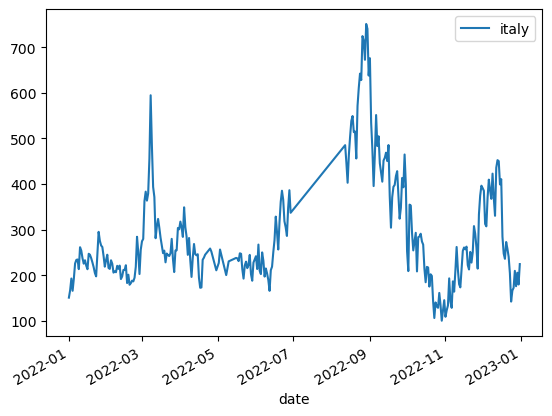

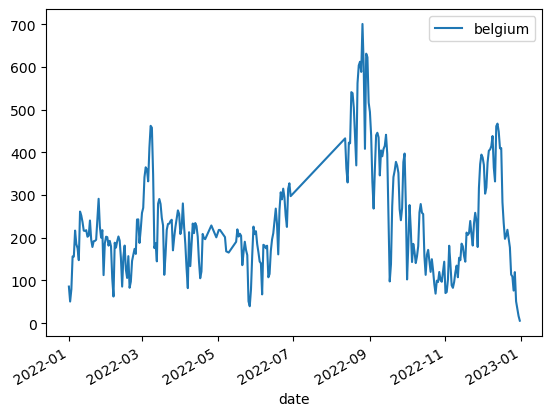

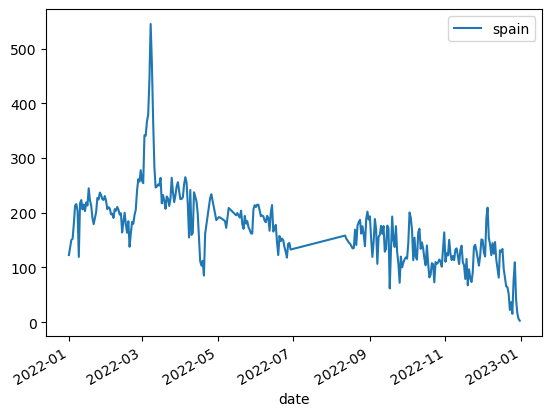

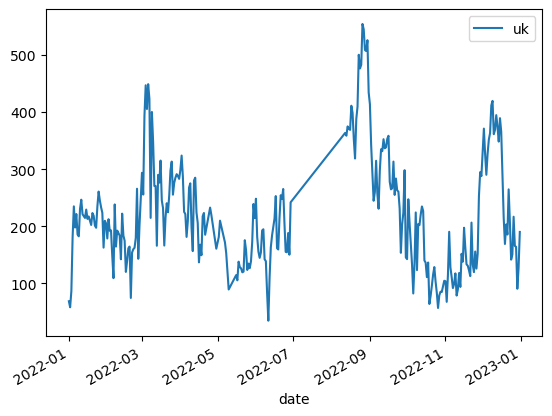

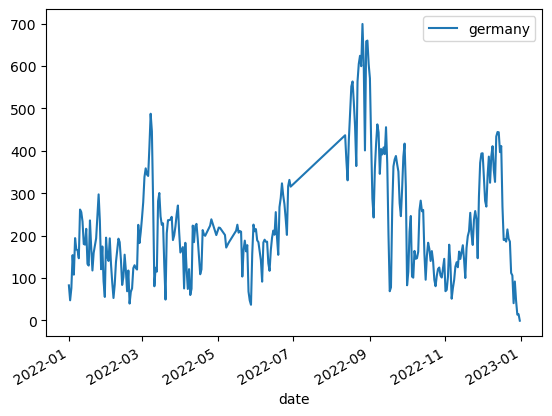

In [8]:
countries =['france','italy','belgium','spain','uk','germany']

for country in countries:
    data.groupby("date")[country].mean().plot(legend=country)
    
    plt.show()

## CO-RELATIONSHIP BETWEEN THE POWER PRICE FOR EACH COUNTRY

In [9]:
data.corr()

,france,italy,belgium,spain,uk,germany
france,1.000000,0.909937,0.886158,0.267348,0.753229,0.867897
italy,0.909937,1.000000,0.878989,0.207639,0.763865,0.872247
belgium,0.886158,0.878989,1.000000,0.247765,0.757588,0.957059
spain,0.267348,0.207639,0.247765,1.000000,0.296733,0.199866
uk,0.753229,0.763865,0.757588,0.296733,1.000000,0.717038
germany,0.867897,0.872247,0.957059,0.199866,0.717038,1.000000


<AxesSubplot:>

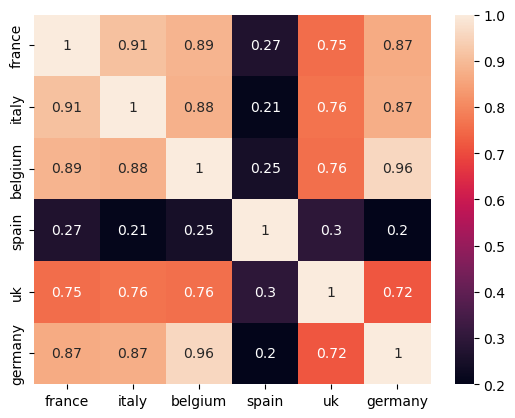

In [10]:
import seaborn as sns
dd =data.drop(['hour','date'],axis =1)
cc =dd.corr()
cc
sns.heatmap(cc,annot = True)

## FOR EASY UNDERSTANDING CONVERTED PERIOD TO HOURS

In [11]:
data['hour'].replace('00:00 - 01:00','1',inplace =True)
data['hour'].replace('01:00 - 02:00','2',inplace =True)
data['hour'].replace('02:00 - 03:00','3',inplace =True)                      
data['hour'].replace('03:00 - 04:00','4',inplace =True)
data['hour'].replace('04:00 - 05:00','5',inplace =True) 
data['hour'].replace('05:00 - 06:00','6',inplace =True)
data['hour'].replace('06:00 - 07:00','7',inplace =True)           
data['hour'].replace('07:00 - 08:00','8',inplace =True)
data['hour'].replace('08:00 - 09:00','9',inplace =True)
data['hour'].replace('09:00 - 10:00','10',inplace =True)
data['hour'].replace('10:00 - 11:00','11',inplace =True)
data['hour'].replace('11:00 - 12:00','12',inplace =True)
data['hour'].replace('12:00 - 13:00','13',inplace =True)
data['hour'].replace('13:00 - 14:00','14',inplace =True)
data['hour'].replace('14:00 - 15:00','15',inplace =True)
data['hour'].replace('15:00 - 16:00','16',inplace =True)
data['hour'].replace('16:00 - 17:00','17',inplace =True)
data['hour'].replace('17:00 - 18:00','18',inplace =True)
data['hour'].replace('18:00 - 19:00','19',inplace =True)
data['hour'].replace('19:00 - 20:00','20',inplace =True)
data['hour'].replace('20:00 - 21:00','21',inplace =True)
data['hour'].replace('21:00 - 22:00','22',inplace =True)
data['hour'].replace('22:00 - 23:00','23',inplace =True)
data['hour'].replace('23:00 - 00:00','24',inplace =True)

In [12]:
data.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022-01-01,1,89.06,170.28,82.02,145.86,0.27,50.05
1,2022-01-01,2,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022-01-01,3,85.16,147.09,75.11,113.87,0.27,43.22
3,2022-01-01,4,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022-01-01,5,37.67,104.00,37.67,97.80,-0.01,37.67


## FRANCE POWER PRICE DATA

In [13]:
data1 = data.drop('date',axis =1)
data1.drop(['italy','belgium','spain','uk','germany'], axis =1)

,hour,france
0,1,89.06
1,2,78.48
2,3,85.16
3,4,50.00
4,5,37.67
...,...,...
8756,20,18.11
8757,21,7.60
8758,22,3.69
8759,23,1.88


## we can know that which hours the price of power is increasing in a day

<BarContainer object of 7319 artists>

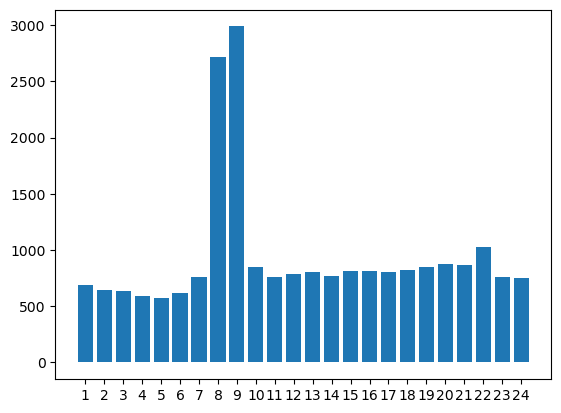

In [14]:
## we are getting high rate of value on 8 and 9 hours
plt.bar(data['hour'],data['france'])


## LINEAR REGRRESSION BETWEEN FRANCE AND OTHER COUNTRIES

In [15]:
fravsger1 =data.drop(['italy','belgium','spain','uk'],axis=1)
fravsitaly1 =data.drop(['belgium','spain','uk','germany'],axis=1)
fravsbel1 =data.drop(['spain','uk','germany','italy'],axis=1)
frasvspain1 =data.drop(['uk','germany','italy','belgium'],axis=1)
fravsuk1=data.drop(['germany','italy','belgium','uk'],axis=1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x1 = fravsger1.drop(['france','date'],axis=1)
y1 =fravsger1['france']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [20]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(5123, 2) (2196, 2) (5123,) (2196,)


In [21]:
model =LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
pred = model.predict(x_test)

In [24]:
pred

array([ 97.56482606, 309.25433538, 339.71956521, ..., 264.16106533,
       183.42305743, 189.027476  ])

In [41]:
fravsger1.tail()


,date,hour,france,germany
8756,2022-12-31,20,18.11,-1.01
8757,2022-12-31,21,7.60,-1.39
8758,2022-12-31,22,3.69,-1.04
8759,2022-12-31,23,1.88,-1.07
8760,2022-12-31,24,0.10,-0.68


In [46]:
input =(1,1)
ina = np.asarray(input)
inr = ina.reshape(1,-1)

In [47]:
model.predict(inr)

C:\Users\91772\anconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.27227274])

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [29]:
metrics.r2_score(y_test, pred)

0.8146117028393105